In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove bad images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 600 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

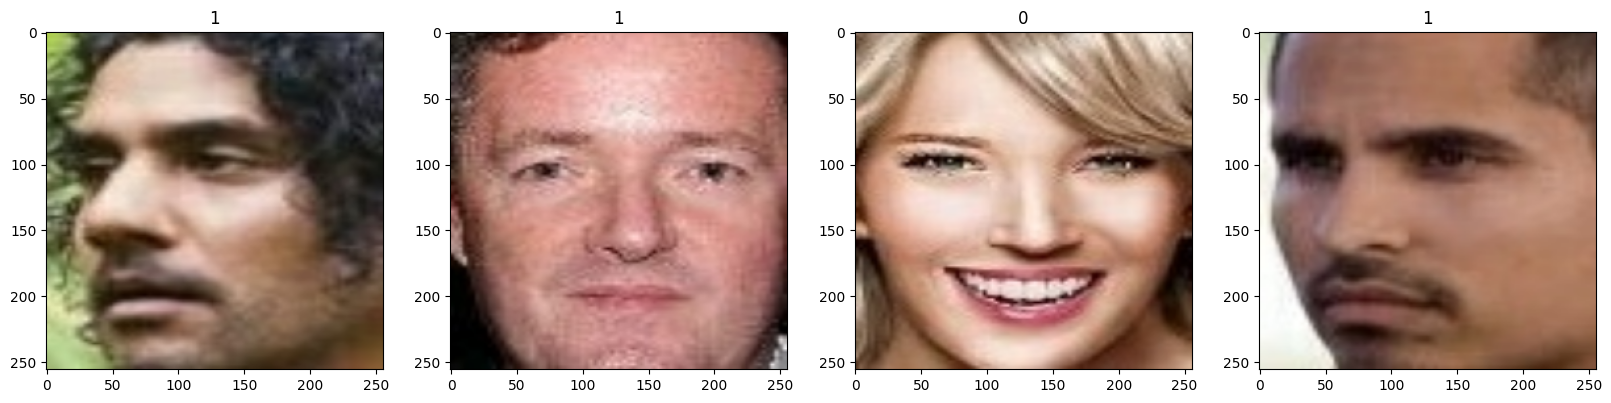

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.15686275, 0.15294118, 0.13725491],
          [0.15660998, 0.15268841, 0.13700214],
          [0.15251991, 0.14859834, 0.13291207],
          ...,
          [0.1626532 , 0.14594056, 0.12385876],
          [0.15719976, 0.13776042, 0.11431526],
          [0.15686275, 0.13725491, 0.11372549]],
 
         [[0.14635417, 0.1424326 , 0.12674633],
          [0.14610142, 0.14217985, 0.12649357],
          [0.14201133, 0.13808976, 0.1224035 ],
          ...,
          [0.16411923, 0.14740661, 0.1253248 ],
          [0.15657815, 0.13713881, 0.11369365],
          [0.15611213, 0.13650429, 0.11297487]],
 
         [[0.12104779, 0.11712623, 0.10143995],
          [0.12079503, 0.11687347, 0.10118719],
          [0.11670496, 0.11278339, 0.09709712],
          ...,
          [0.16764969, 0.15093707, 0.12885527],
          [0.15508124, 0.1356419 , 0.11219674],
          [0.15430453, 0.13469669, 0.11116728]],
 
         ...,
 
         [[0.763511  , 0.763511  , 0.8027267 ],
          [0.76303

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

13

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 21s 1s/step - loss: 0.8874 - accuracy: 0.5168 - val_loss: 0.6592 - val_accuracy: 0.5625
Epoch 2/20
13/13 [==============================] - 17s 1s/step - loss: 0.5877 - accuracy: 0.7043 - val_loss: 0.4842 - val_accuracy: 0.8646
Epoch 3/20
13/13 [==============================] - 17s 1s/step - loss: 0.4071 - accuracy: 0.8317 - val_loss: 0.4046 - val_accuracy: 0.8333
Epoch 4/20
13/13 [==============================] - 17s 1s/step - loss: 0.2946 - accuracy: 0.8942 - val_loss: 0.2191 - val_accuracy: 0.9479
Epoch 5/20
13/13 [==============================] - 17s 1s/step - loss: 0.2420 - accuracy: 0.8966 - val_loss: 0.1592 - val_accuracy: 0.9583
Epoch 6/20
13/13 [==============================] - 17s 1s/step - loss: 0.1700 - accuracy: 0.9303 - val_loss: 0.0978 - val_accuracy: 0.9792
Epoch 7/20
13/13 [==============================] - 17s 1s/step - loss: 0.1061 - accuracy: 0.9736 - val_loss: 0.1454 - val_accuracy: 0.9479
Epoch 8/20
13/13 [==

# 8. Plot Performance

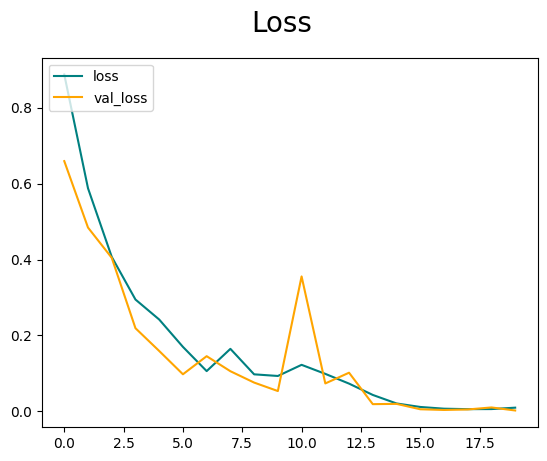

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

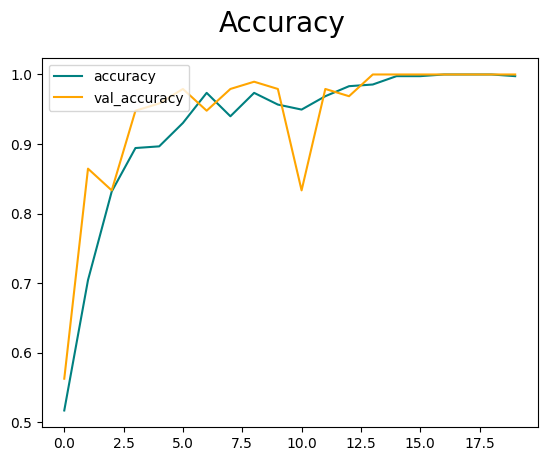

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 599ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

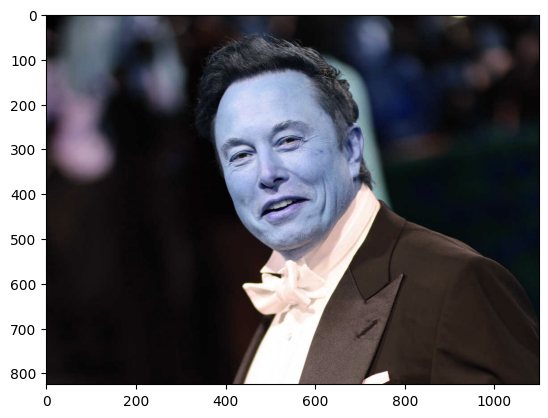

In [63]:
img = cv2.imread('musk.jpg')
plt.imshow(img)
plt.show()

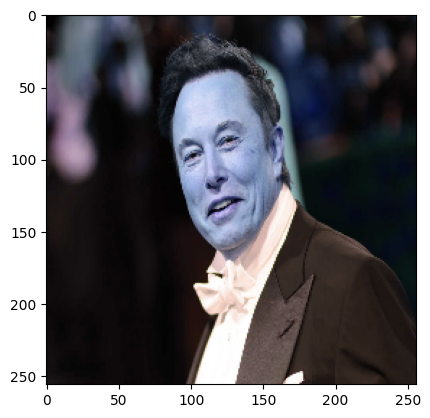

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [66]:
yhat

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.0897595 , 0.10544577, 0.14858302],
         [0.11350337, 0.12918964, 0.1723269 ],
         [0.12781097, 0.1356541 , 0.20624234]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.07125777, 0.08694404, 0.1300813 ],
         [0.09302237, 0.10870864, 0.15184589],
         [0.10994179, 0.11778492, 0.18837316]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.06834406, 0.07966452, 0.11625306],
         [0.08911612, 0.10043658, 0.13702512],
         [0.10018532, 0.11239427, 0.16770217]],

        ...,

        [[0.10196079, 0.08235294, 0.08627451],
         [0.10196079, 0.08235294, 0.08627451]

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is male')
else:
    print(f'Predicted class is female')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()